# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [2]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xbotlo01.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

signal, fs = sf.read("xbotlo01.wav")


--2023-12-17 21:19:21--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xbotlo01.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xbotlo01.wav’

xbotlo01.wav        100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 21:19:23 (68.9 MB/s) - ‘xbotlo01.wav’ saved [10044/10044]

--2023-12-17 21:19:23--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav’

FIB.wav             100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 21:

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

--2023-12-17 21:37:48--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xbotlo01.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xbotlo01.wav.2’

xbotlo01.wav.2      100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 21:37:50 (150 MB/s) - ‘xbotlo01.wav.2’ saved [10044/10044]



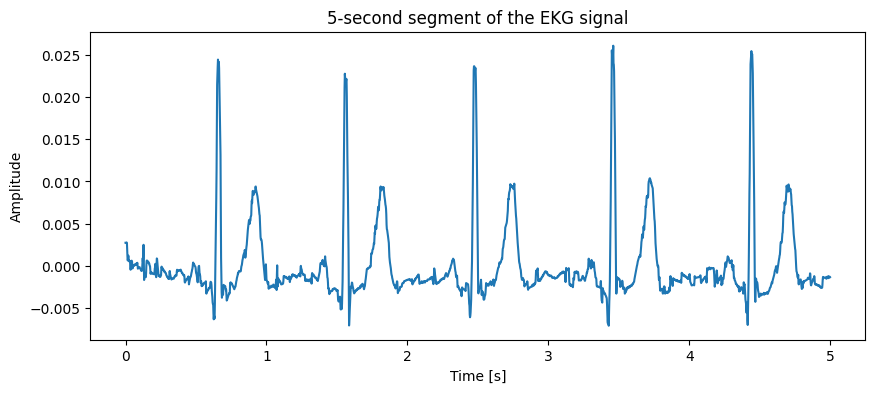

In [15]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# Download the audio file
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xbotlo01.wav

# Load the EKG signal and its sampling frequency
signal, fs = sf.read('xbotlo01.wav')

# Calculate the number of samples for 5 seconds
num_samples = 5 * fs

# Select a 5-second segment (for example, from the beginning of the signal)
segment = signal[:num_samples]

# Create a time axis for plotting
time_axis = np.arange(num_samples) / fs

# Display the signal
plt.figure(figsize=(10, 4))
plt.plot(time_axis, segment)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('5-second segment of the EKG signal')
plt.show()



b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

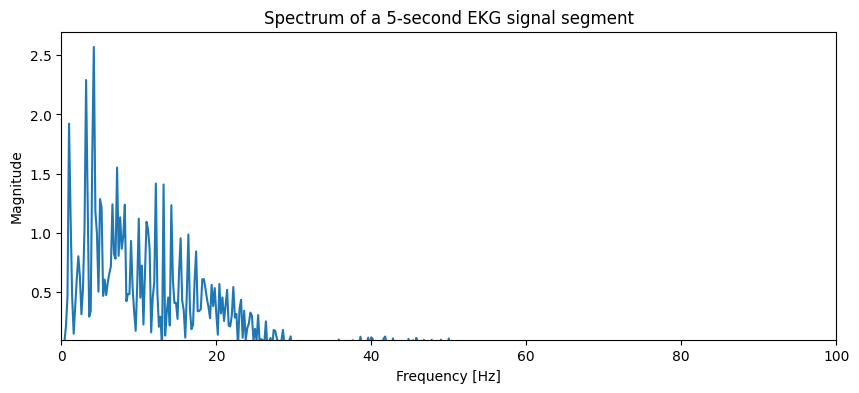

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Use FFT to compute the spectrum
fft_signal = np.fft.fft(segment)
fft_freq = np.fft.fftfreq(num_samples, 1/fs)

# Compute the absolute value (magnitude) of the spectrum
magnitude = np.abs(fft_signal)

# Plot the spectrum with a limit on frequencies up to 100 Hz
plt.figure(figsize=(10, 4))
plt.plot(fft_freq, magnitude)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Spectrum of a 5-second EKG signal segment')
plt.xlim([0, 100])  # Display frequencies only up to 100 Hz
plt.ylim(bottom=0.1)  # Set minimum value on the y-axis to remove the line at zero
plt.show()



 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

This interference is caused by the induction of electrical signals from the grid into measuring instruments and conductors.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [17]:
from scipy.signal import butter, filtfilt, decimate

# Design of a low-pass filter with a cutoff frequency just below 50 Hz
nyquist = fs / 2
cutoff_frequency = 50  # Just below 50 Hz for anti-aliasing
order = 5  # Filter order
# Creating the filter
b, a = butter(order, cutoff_frequency/nyquist, btype='low')

# Applying the filter to the signal
filtered_signal = filtfilt(b, a, signal)

# Resampling the signal to 100 Hz
new_fs = 100  # New sampling frequency
resampled_signal = decimate(filtered_signal, int(fs/new_fs))


b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

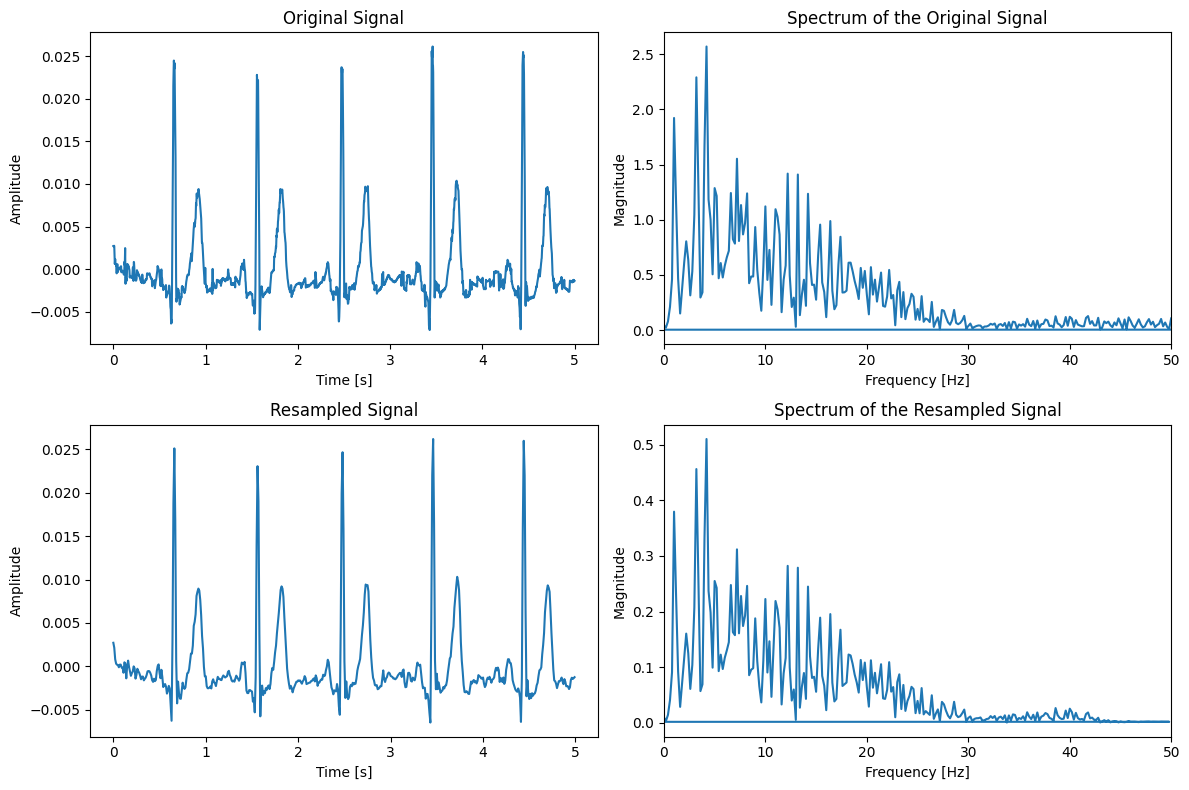

In [18]:
from scipy.signal import butter, filtfilt, decimate
import numpy as np
import matplotlib.pyplot as plt

# Design and application of a low-pass filter for anti-aliasing
nyquist = fs / 2
cutoff = nyquist / 2  # Half of the original Nyquist frequency for anti-aliasing
b, a = butter(5, cutoff / nyquist)
filtered_signal = filtfilt(b, a, signal)

# Resampling the signal to a new sampling frequency of 100 Hz
downsample_factor = int(fs / 100)
resampled_signal = decimate(filtered_signal, downsample_factor)

# Select 5-second segments of both signals
segment_original = signal[:5 * fs]
segment_resampled = resampled_signal[:5 * 100]  # 5 seconds at 100 Hz

# Creating time axes
time_original = np.arange(segment_original.size) / fs
time_resampled = np.arange(segment_resampled.size) / 100

# Spectra
fft_original = np.fft.fft(segment_original)
fft_resampled = np.fft.fft(segment_resampled)
freq_original = np.fft.fftfreq(segment_original.size, 1/fs)
freq_resampled = np.fft.fftfreq(segment_resampled.size, 1/100)

# Plotting time domains
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time_original, segment_original)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(time_resampled, segment_resampled)
plt.title('Resampled Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plotting spectra
plt.subplot(2, 2, 2)
plt.plot(freq_original, np.abs(fft_original))
plt.title('Spectrum of the Original Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([0, 50])

plt.subplot(2, 2, 4)
plt.plot(freq_resampled, np.abs(fft_resampled))
plt.title('Spectrum of the Resampled Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([0, 50])  # Display only the positive part of the spectrum up to 50 Hz

plt.tight_layout()
plt.show()



### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

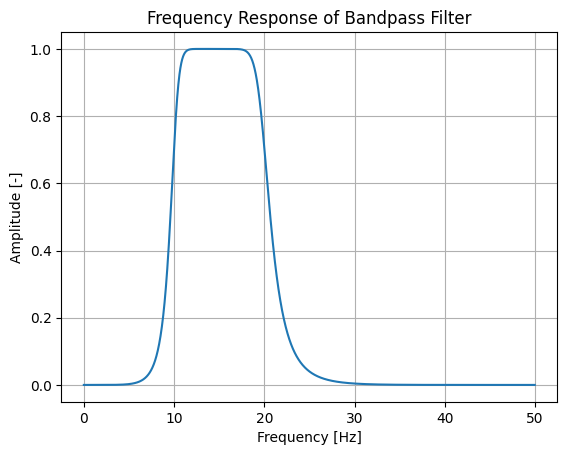

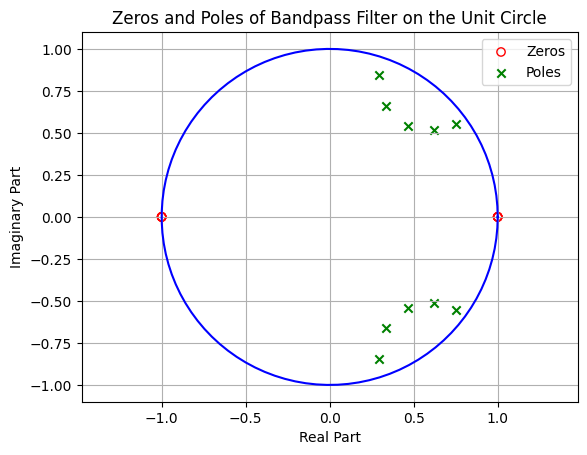

In [19]:
from scipy.signal import butter, lfilter, freqz, tf2zpk
import matplotlib.pyplot as plt
import numpy as np

# Bandpass filter parameters
fs = 100  # Sampling frequency
lowcut = 10.0  # Lower band edge
highcut = 20.0  # Upper band edge

# Design of the bandpass filter
b, a = butter(N=5, Wn=[lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')

# Plotting the frequency response of the filter
w, h = freqz(b, a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title('Frequency Response of Bandpass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.grid(True)
plt.show()

# Getting zeros and poles of the filter
z, p, k = tf2zpk(b, a)

# Plotting the unit circle
angles = np.linspace(0, 2 * np.pi, 100)
circle = np.exp(1j * angles)

plt.figure()
plt.plot(circle.real, circle.imag, 'b-')  # unit circle
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='Poles')
plt.title('Zeros and Poles of Bandpass Filter on the Unit Circle')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()



  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


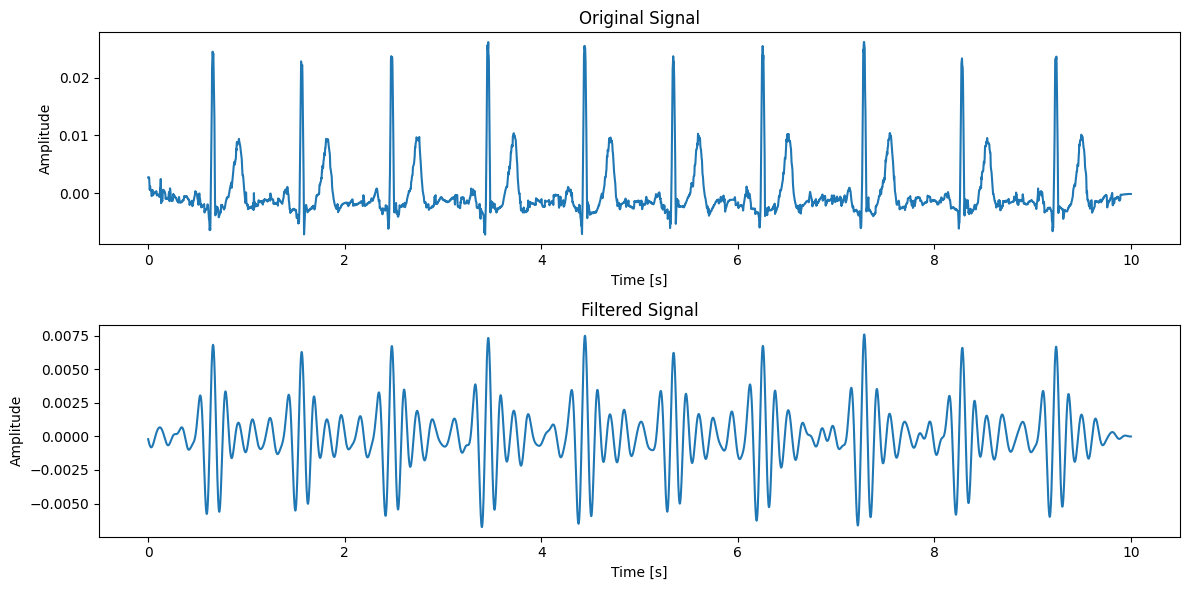

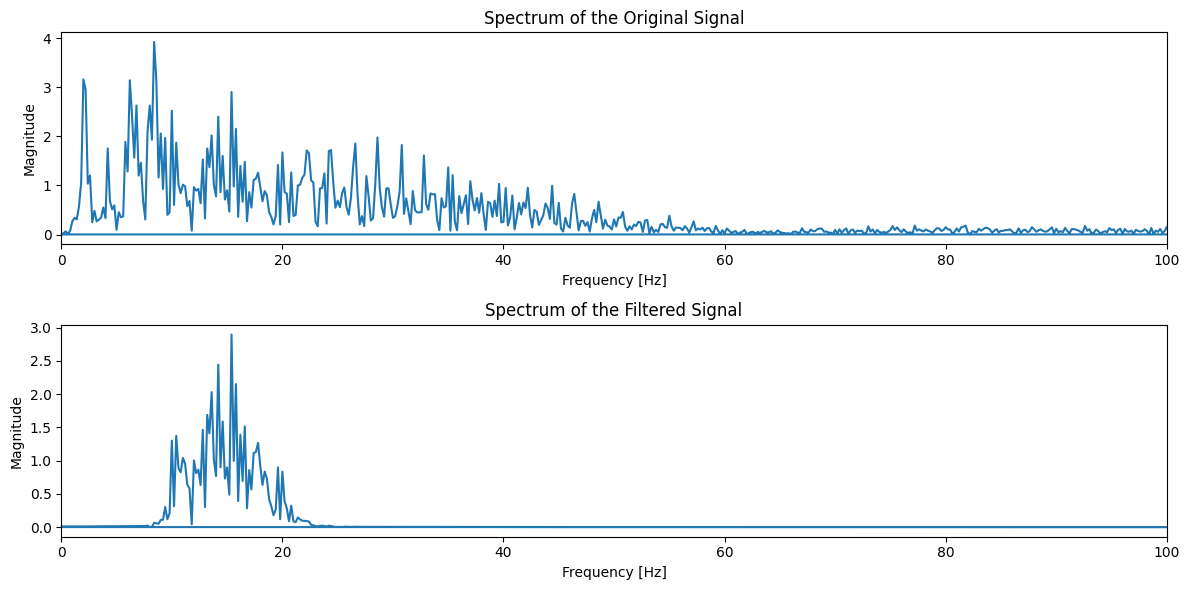

In [20]:
from scipy.signal import butter, filtfilt, freqz
import numpy as np
import matplotlib.pyplot as plt

# Bandpass filter parameters
fs = 1000  # Replace with actual sampling frequency
lowcut = 10.0  # Lower band edge
highcut = 20.0  # Upper band edge

# Design of the bandpass filter
b, a = butter(N=5, Wn=[lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')

# Applying the filter to the signal
filtered_signal = filtfilt(b, a, signal)

# FFT calculation for the original and filtered signal
fft_original = np.fft.fft(signal)
fft_filtered = np.fft.fft(filtered_signal)
frequencies = np.fft.fftfreq(len(signal), 1/fs)

# Creating x-axis in seconds
time = np.arange(len(signal)) * 2 / fs

# Plotting time domains
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plotting spectra
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(fft_original))
plt.title('Spectrum of the Original Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([0, 100])

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_filtered))
plt.title('Spectrum of the Filtered Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([0, 100])

plt.tight_layout()
plt.show()


  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



The filtered signal has the noise removed and only captures frequencies in the range of 10 to 20 Hz, which is typical for the QRS complex of an ECG. This leads to a cleaner spectrum with a focus on important parts of the signal. If filtering were used from one side only, a phase shift could occur, which could be as long as the length of the filter in samples, because each filter coefficient causes a delay of one sampling interval.

### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.


   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

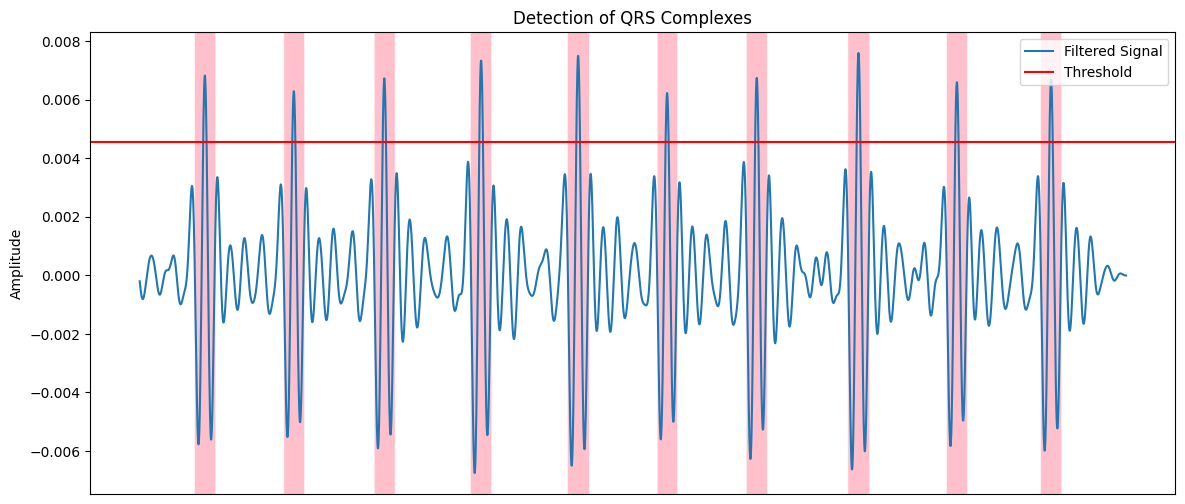

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Find the maximum amplitude in the signal (using absolute value due to possible inversion of QRS complexes).
max_amplitude = np.max(np.abs(filtered_signal))

# Now, I'll set a threshold.
threshold_percentage = 0.6  # for example, 60% of the maximum amplitude
threshold = threshold_percentage * max_amplitude

# Find points in the signal where the threshold is exceeded.
detections = np.where((filtered_signal > threshold) | (filtered_signal < -threshold))[0]

# Plot the signal along with the threshold and highlight the detections of QRS complexes.

# Plot the signal along with the threshold and highlight the detections of QRS complexes.
plt.figure(figsize=(14, 6))
plt.plot(filtered_signal, label='Filtered Signal')

# Plot the threshold.
plt.axhline(y=threshold, color='r', linestyle='-', label='Threshold')

# Highlight the detections.
# Setting the width of the interval around detected QRS complexes.
interval_width_samples = 10  # Bandwidth in number of samples, you can adjust it
for detection in detections:
    plt.axvspan(detection - interval_width_samples, detection + interval_width_samples, color='pink', alpha=0.5)

plt.title('Detection of QRS Complexes')
plt.ylabel('Amplitude')
plt.legend()
plt.xticks([])  # Remove labels on the x-axis
plt.show()


b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

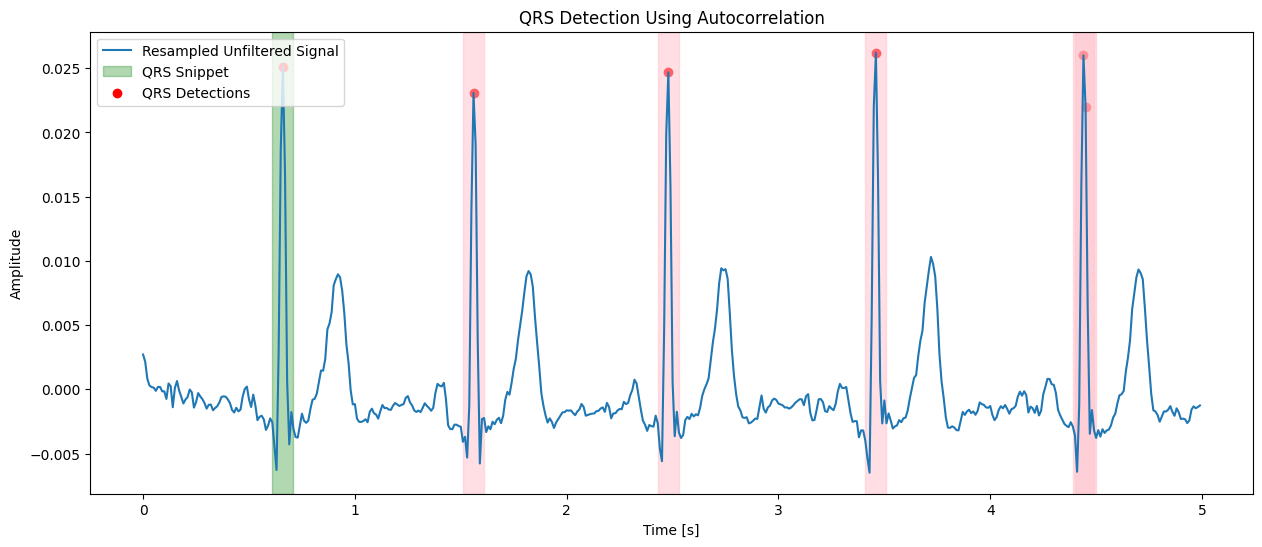

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, correlate

# Assuming that the length of the QRS complex sample is 0.1 seconds
qrs_sample_length = int(0.1 * new_fs)

# Setting the shift so that the peak is approximately in the middle of the QRS sample
shift_samples = qrs_sample_length // 2

# Identifying the first high peak as a QRS complex
peak_threshold = 0.8 * np.max(segment_resampled)
peaks, _ = find_peaks(segment_resampled, height=peak_threshold)

# Ensuring that at least one peak is found and it's not too early in the signal for the shift
if peaks.size > 0 and peaks[0] > shift_samples:
    first_peak_index = peaks[0] - shift_samples
else:
    first_peak_index = 0  # Default to start if no peaks above threshold are found or they are too early

# Sampling the QRS complex
qrs_sample_start_index = first_peak_index
qrs_sample_end_index = qrs_sample_start_index + qrs_sample_length
qrs_sample = segment_resampled[qrs_sample_start_index:qrs_sample_end_index]

# Performing autocorrelation of the signal with the QRS snippet
correlated = correlate(segment_resampled, qrs_sample, mode='same')

# Finding indexes with high correlation
threshold = 0.8 * np.max(correlated)
detections = np.where(correlated > threshold)[0]

# Getting the time axis for the signal
time_axis = np.arange(len(segment_resampled)) / new_fs

# Plotting the signal and detections
plt.figure(figsize=(15, 6))

# Plotting the resampled unfiltered signal
plt.plot(time_axis, segment_resampled, label='Resampled Unfiltered Signal')

# Highlighting the first QRS complex sample
plt.axvspan(time_axis[qrs_sample_start_index], time_axis[qrs_sample_end_index], color='green', alpha=0.3, label='QRS Snippet')

# Highlighting detections with red dots
plt.scatter(time_axis[detections], segment_resampled[detections], color='red', label='QRS Detections')

# Highlighting additional detections in pink
for detection in detections[1:]:  # Skipping the first detection since it's already highlighted
    plt.axvspan(time_axis[detection] - (shift_samples / new_fs), time_axis[detection] + (qrs_sample_length - shift_samples) / new_fs, color='pink', alpha=0.5)

# Setting the legend and title
plt.title('QRS Detection Using Autocorrelation')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.show()




### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

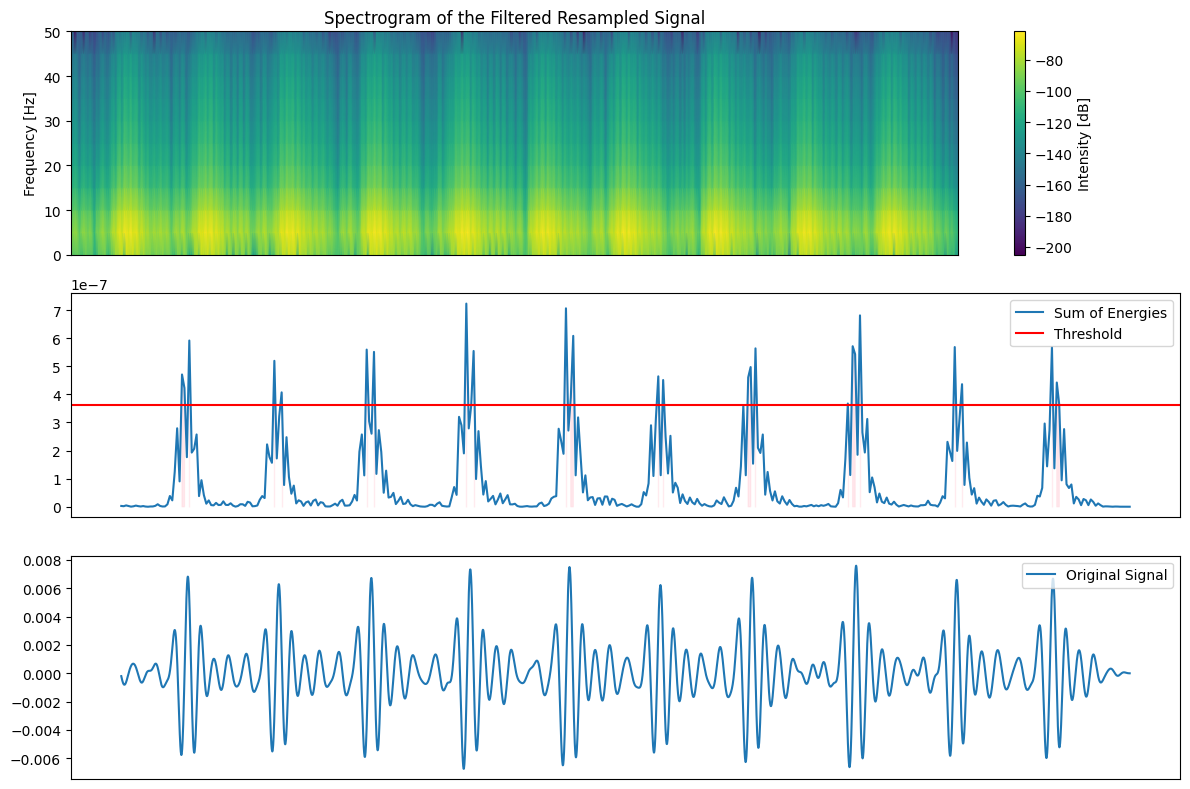

In [23]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Assume 'new_fs' is the new sampling frequency and 'filtered_signal' is the filtered signal

# Define spectrogram parameters
hop_size = int(0.12 * new_fs)  # hop size of 120 ms
window_len = int(0.2 * new_fs)  # window size of 200 ms

# Compute the spectrogram
frequencies, times, Sxx = signal.spectrogram(filtered_signal, fs=new_fs, window='hann', nperseg=window_len, noverlap=window_len - hop_size)

# Convert to dB
Sxx_dB = 10 * np.log10(Sxx)

# Calculate the sum of spectral energies
energy_sum = np.sum(Sxx, axis=0)

# Set a threshold for QRS complex detection
threshold = np.mean(energy_sum) + 2 * np.std(energy_sum)  # example threshold

# Determine where the sums of energies are higher than the threshold
qrs_detected = times[energy_sum > threshold]

# Plot the spectrogram
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.pcolormesh(times, frequencies, Sxx_dB, shading='gouraud')
plt.colorbar(label='Intensity [dB]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram of the Filtered Resampled Signal')
plt.xticks([])

# Plot the sum of spectral energies
plt.subplot(3, 1, 2)
plt.plot(times, energy_sum, label='Sum of Energies')
plt.axhline(y=threshold, color='r', linestyle='-', label='Threshold')
plt.fill_between(times, energy_sum, where=(energy_sum > threshold), color='pink', alpha=0.3)
plt.legend()
plt.xticks([])

# Plot the QRS complexes in the original signal
plt.subplot(3, 1, 3)
signal_time = np.arange(len(filtered_signal)) / new_fs  # Time vector for the signal
plt.plot(signal_time, filtered_signal, label='Original Signal')
plt.legend()
plt.xticks([])

plt.tight_layout()
plt.show()

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

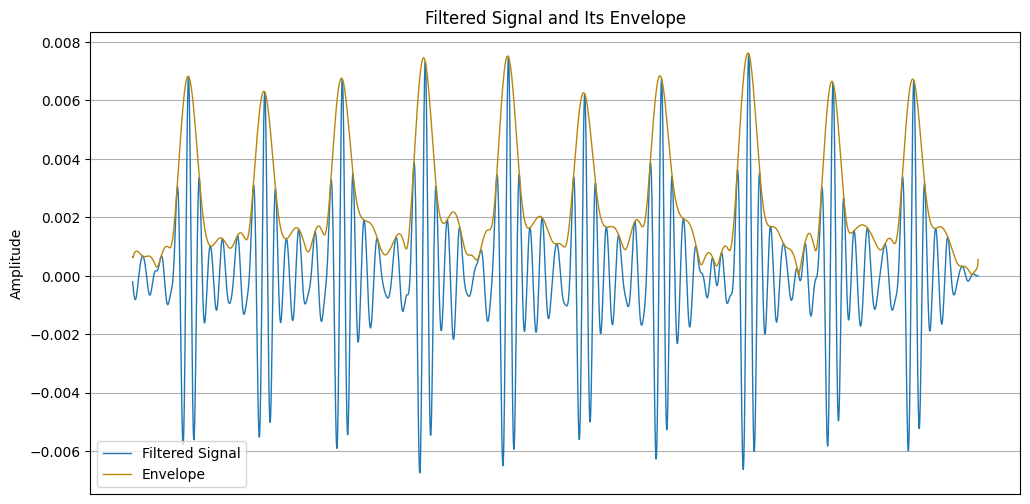

In [24]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import filtfilt
import soundfile as sf

# Function to perform Hilbert transform without using scipy.signal.hilbert
def custom_hilbert(signal):
    N = len(signal)
    H = np.zeros(N)
    H[0] = 1
    H[1:(N+1)//2] = 2  # double the positive frequency components
    # Perform the Hilbert transform by multiplying with the Heaviside function in the frequency domain
    return np.fft.ifft(np.fft.fft(signal) * H)

# Assuming 'filtered_signal' is the already filtered signal you want to analyze
# If not, apply filtering method here before Hilbert transformation

# Perform Hilbert transformation on the filtered signal
# 'filtered_signal' should be a variable defined in the previous code
analytic_signal = custom_hilbert(filtered_signal)
envelope = np.abs(analytic_signal)

# Make sure the signal and its envelope have the same length
min_length = min(len(filtered_signal), len(envelope))
filtered_signal = filtered_signal[:min_length]
envelope = envelope[:min_length]

# Plot the filtered signal and its envelope
plt.figure(figsize=(12, 6))

# Plot the filtered signal
plt.plot(filtered_signal, label='Filtered Signal', linewidth=1)

# Plot the envelope as a continuous line
plt.plot(envelope, label='Envelope', color='darkgoldenrod', linewidth=1)

plt.title('Filtered Signal and Its Envelope')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xticks([])
plt.show()







c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

Threshold-based methods: These are sensitive to an inverted signal because they expect QRS complexes to have a positive amplitude. An inverted signal will make peaks negative, which can lead to incorrect detection.

Derivative-based methods: These are less sensitive to signal inversion, as they track changes in the signal, not its absolute height.

Transformation methods: These are more resilient to an inverted signal, looking for specific patterns regardless of orientation.

Adaptive and machine learning methods: Dependence on how they were trained. If trained on data with inverted signals, they can be resilient to such signals.







### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.



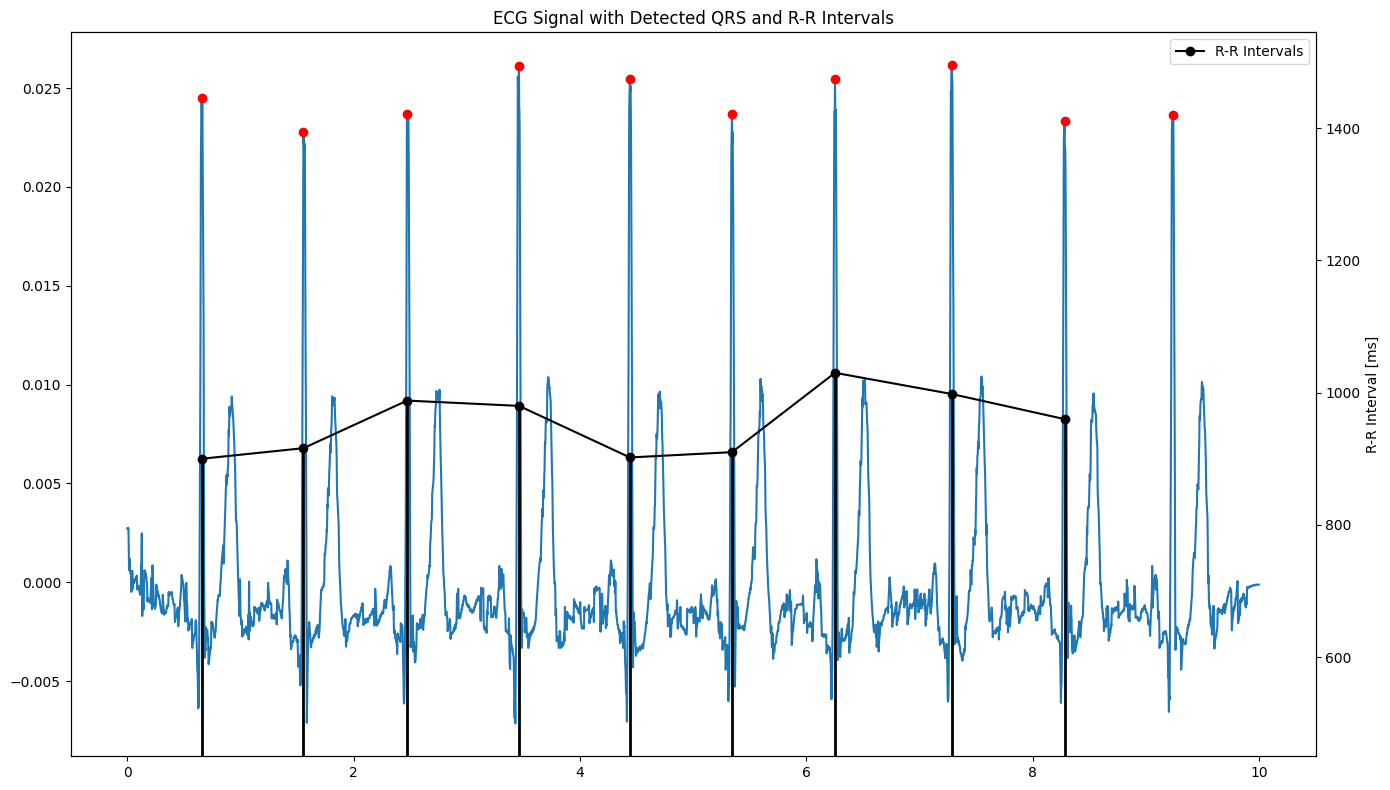

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import soundfile as sf

# Function to load ECG signal and its sampling frequency from a .wav file
def load_ecg_signal(file_name):
    signal, fs = sf.read(file_name)
    return signal, fs

# Function to detect QRS complex peaks
def detect_qrs(signal, fs, threshold_ratio, min_distance_sec):
    threshold_value = np.max(signal) * threshold_ratio
    peaks, _ = find_peaks(signal, height=threshold_value, distance=fs * min_distance_sec)
    return peaks

# Function to plot ECG signal, detected peaks, and R-R intervals
def plot_ecg_rr(signal, fs, peaks, file_name='ECG'):
    qrs_times = peaks / fs
    rr_intervals = np.diff(qrs_times)
    rr_intervals_ms = rr_intervals * 1000

    plt.figure(figsize=(14, 8))
    plt.plot(np.arange(len(signal)) / fs, signal, label='ECG Signal', zorder=1)
    plt.scatter(qrs_times, signal[peaks], color='red', zorder=2)

    ax2 = plt.gca().twinx()
    rr_min, rr_max = np.min(rr_intervals_ms), np.max(rr_intervals_ms)
    ax2.set_ylim([rr_min * 0.5, rr_max * 1.5])
    ax2.vlines(qrs_times[:-1], 0, rr_intervals_ms, color='black', lw=2, zorder=3)
    ax2.plot(qrs_times[:-1], rr_intervals_ms, 'ko-', label='R-R Intervals', zorder=4)

    plt.xlabel('Time [s]')
    plt.ylabel('Signal Magnitude', color='blue')
    ax2.set_ylabel('R-R Interval [ms]', color='black')
    plt.title(f'{file_name} Signal with Detected QRS and R-R Intervals')
    plt.legend()
    plt.tight_layout()
    plt.show()


# Load the signal and sampling frequency
signal, fs = load_ecg_signal('xbotlo01.wav')

# Detect QRS complex peaks
peaks = detect_qrs(signal, fs, threshold_ratio=0.6, min_distance_sec=0.6)

# Plot the signal with detected peaks and R-R intervals
plot_ecg_rr(signal, fs, peaks)





### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [ ]:
# Zde napište váš kód

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [ ]:
# Zde napište váš kód